imports

In [1]:
from torchvision import transforms
from detecto import core, utils, visualize
import torch

import matplotlib.pyplot as plt
import random

convert labels to csv for faster access (only needs to be once)

In [2]:
utils.xml_to_csv('train_labels', 'train.csv')
utils.xml_to_csv('val_labels', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,Fives 10.jpg,2592,1944,f,741,416,1053,639,0
1,Fives 10.jpg,2592,1944,f,1182,439,1488,657,0
2,Fives 10.jpg,2592,1944,f,1623,404,1923,616,0
3,Fives 10.jpg,2592,1944,f,594,757,959,1022,0
4,Fives 10.jpg,2592,1944,f,1153,772,1500,1048,0
...,...,...,...,...,...,...,...,...,...
184,Yellows 38.jpg,2592,1944,y,889,847,1231,1125,16
185,Yellows 38.jpg,2592,1944,y,1339,862,1682,1145,16
186,Yellows 38.jpg,2592,1944,y,398,1343,746,1648,16
187,Yellows 38.jpg,2592,1944,y,922,1312,1243,1612,16


prepare dataset

In [3]:
# prepare transformation chain for data augmentation and normalization
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

# generate augmented dataset
dataset = core.Dataset('train.csv', 'images/', transform=transform_img)

# prepare validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# prepare dataset loader
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

prepare model

In [4]:
model = core.Model(['f', 's', 'y'], model_name=core.Model.MOBILENET)

c:\Users\drago\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\drago\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train model (and get loss function)

In [5]:
losses = model.fit(loader, val_dataset, epochs=20, verbose=True)

Epoch 1 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:52<00:00,  1.08s/it]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:07<00:00,  2.39it/s]


Loss: 0.7826924148727866
Epoch 2 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:39<00:00,  1.24it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:07<00:00,  2.42it/s]


Loss: 0.5792520133888021
Epoch 3 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:33<00:00,  1.47it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.79it/s]


Loss: 0.8551517128944397
Epoch 4 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:23<00:00,  2.10it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.80it/s]


Loss: 0.6884952608276816
Epoch 5 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.17it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.82it/s]


Loss: 0.7397379559629104
Epoch 6 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.19it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.83it/s]


Loss: 0.8066179261488073
Epoch 7 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:23<00:00,  2.10it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.72it/s]


Loss: 0.7370528070365682
Epoch 8 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:23<00:00,  2.08it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.83it/s]


Loss: 0.7253342498751247
Epoch 9 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.16it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.82it/s]


Loss: 0.7262414991855621
Epoch 10 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:23<00:00,  2.08it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.63it/s]


Loss: 0.7280894377652336
Epoch 11 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:23<00:00,  2.12it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.71it/s]


Loss: 0.7254439417053672
Epoch 12 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.14it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.81it/s]


Loss: 0.723889550741981
Epoch 13 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.16it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.83it/s]


Loss: 0.7240466861163869
Epoch 14 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.16it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.84it/s]


Loss: 0.7277695729452021
Epoch 15 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.17it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.79it/s]


Loss: 0.7229227686629576
Epoch 16 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.19it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.78it/s]


Loss: 0.7196079439976636
Epoch 17 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.17it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.82it/s]


Loss: 0.7264813605476829
Epoch 18 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.17it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.83it/s]


Loss: 0.7196139500421637
Epoch 19 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.18it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.85it/s]


Loss: 0.7283114808447221
Epoch 20 of 20
Begin iterating over training dataset


100%|██████████| 49/49 [00:22<00:00,  2.17it/s]


Begin iterating over validation dataset


100%|██████████| 17/17 [00:04<00:00,  3.84it/s]

Loss: 0.7226484961369458


display loss function

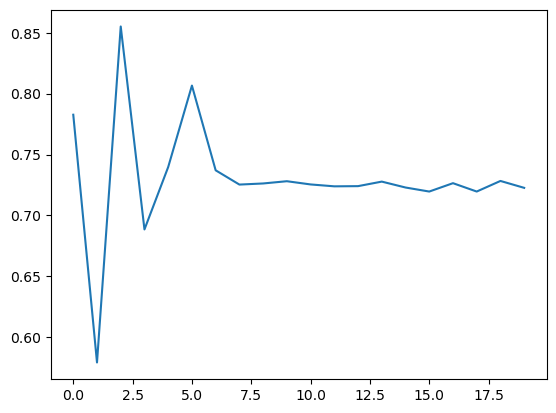

In [6]:
plt.plot(losses)
plt.show()

validation examples

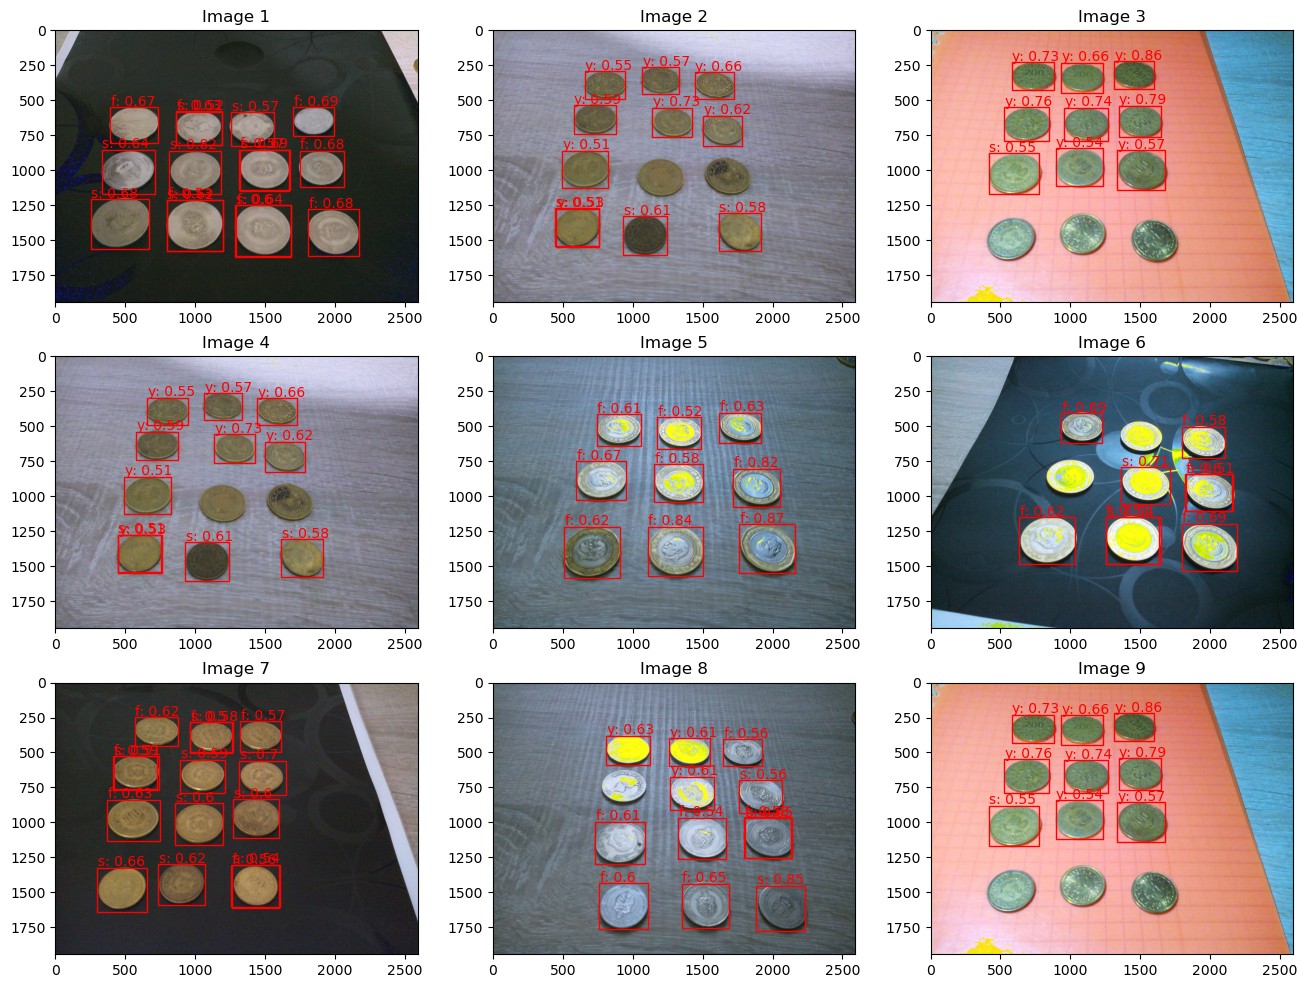

In [8]:
images = []
for i in range(9):
		image, _ = val_dataset[random.randint(0, len(val_dataset) - 1)]
		images.append(image)

visualize.plot_prediction_grid(model, images, dim=(3, 3), figsize=(16, 12), score_filter=0.5)

save model

In [7]:
inModel = model.get_internal_model()
torch.save(inModel, 'inModel.pth')